# Sentiment Analysis
## Predicting Rating from Review

### 1) Imports

In [467]:
import pandas as pd
import numpy as np
import scipy 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfTransformer
vectoriser = CountVectorizer()

import statsmodels.api as sms

%matplotlib inline

import pickle


### Reading data

In [468]:
d = pd.read_csv('review_meta_train.csv')
d['review_text'] = pd.read_csv('review_text_train.csv')
data = d[['review_text', 'rating']]
del d
data.head()

,review_text,rating
0,dear longman & eagle.......you've left me no c...,1
1,Delish. The hubby and I wanted to do brunch on...,5
2,"yep, I've giving Yolk 5 stars. It's just reall...",5
3,"Meat, meat, meat. It's meat-tastic. So much me...",3
4,I caught up with the law school girls on a Sat...,3


5    19288
3     6444
1     2336
Name: rating, dtype: int64
28068


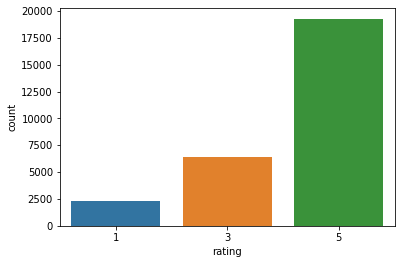

In [469]:
sns.countplot(x='rating', data=data)
print(data['rating'].value_counts())
print(data['rating'].count())
zeror = 19288/28068

### Loading data and processing it

In [470]:
data_50_test = pd.read_csv(r"review_text_test_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
data_200_test = pd.read_csv(r"review_text_test_doc2vec200.csv", index_col = False, delimiter = ',', header=None)

data_50f = pd.read_csv(r"review_text_train_doc2vec50.csv", index_col = False, delimiter = ',', header=None)
data_100f = pd.read_csv(r"review_text_train_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
data_200f = pd.read_csv(r"review_text_train_doc2vec200.csv", index_col = False, delimiter = ',', header=None)

x_train_txt = data['review_text']
x = vectoriser.fit_transform(x_train_txt)
y = data['rating']

x_train50, x_test50, y_train50, y_test50 = train_test_split(data_50f, y, test_size=0.3, random_state=1)
x_train100, x_test100, y_train100, y_test100 = train_test_split(data_100f, y, test_size=0.3, random_state=1)
x_train200, x_test200, y_train200, y_test200 = train_test_split(data_200f, y, test_size=0.3, random_state=1)
x_train_complete, x_test_complete, y_train_complete, y_test_complete = train_test_split(x, y, test_size=0.3, random_state=1)

In [471]:
x_given_nostop = scipy.sparse.load_npz('review_text_train_vec.npz')
x_train_nostop, x_test_nostop, y_train_nostop, ygiven_test_nostop = train_test_split(x_given_nostop, y, test_size=0.3, random_state=0)
x_given_nostop_test = scipy.sparse.load_npz('review_text_test_vec.npz')

In [472]:
# inverse document frequency:

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer().fit(x_given_nostop)
inversedoc_x = transformer.transform(x_given_nostop)
x_train_inverse, x_test_inverse, y_train_inverse, y_test_inverse = train_test_split(inversedoc_x, y, test_size=0.3, random_state=0)



In [473]:
# scale Data
scaler = MinMaxScaler()

scaler.fit(data_50f)
data_50s = scaler.transform(data_50f)
x_train50s, x_test50s, y_train50s, y_test50s = train_test_split(data_50s, y, test_size=0.3, random_state=1)

scaler.fit(data_100f)
data_100s = scaler.transform(data_100f)
x_train100s, x_test100s, y_train100s, y_test100s = train_test_split(data_100s, y, test_size=0.3, random_state=1)

scaler.fit(data_200f)
data_200s = scaler.transform(data_200f)
x_train200s, x_test200s, y_train200s, y_test200s = train_test_split(data_200s, y, test_size=0.3, random_state=1)


### Models

In [474]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [475]:
Xs = [(x_train50s, x_test50s, y_train50s, y_test50s), 
     (x_train100s, x_test100s, y_train100s, y_test100s), 
     (x_train200s, x_test200s, y_train200s, y_test200s),
     (x_train_complete, x_test_complete, y_train_complete, y_test_complete),
     (x_train_nostop, x_test_nostop, y_train_nostop, ygiven_test_nostop)]

X_names = ['50 features', '100 features', '200 features', 'Complete', 'no-stop']


In [476]:
model = DecisionTreeClassifier(max_depth=1)
print('0R\t\t acc',zeror,'\n')

print('One-R')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    print(X_name, '\t acc',  acc)

0R		 acc 0.6871882570899245 

One-R
50 features 	 acc 0.6830542690891818
100 features 	 acc 0.6830542690891818
200 features 	 acc 0.6830542690891818
Complete 	 acc 0.6830542690891818
no-stop 	 acc 0.7001543759648498


In [477]:
model = MultinomialNB()
print('MNB')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    print(X_name, '\t acc',  acc)

MNB
50 features 	 acc 0.6830542690891818
100 features 	 acc 0.6830542690891818
200 features 	 acc 0.6830542690891818
Complete 	 acc 0.8399239995249971
no-stop 	 acc 0.8389739935874599


In [478]:
model = GaussianNB()
print('GNB')
model.fit(x_train50s, y_train50s)
acc = model.score(x_test50s, y_test50s)
print('50 features\t acc', acc)

model.fit(x_train100s, y_train100s)
acc = model.score(x_test100s, y_test100s)
print('100 features\t acc', acc)

model.fit(x_train200s, y_train200s)
acc = model.score(x_test200s, y_test200s)
print('200 features\t acc', acc)

GNB
50 features	 acc 0.7223607647547797
100 features	 acc 0.6677354233463959
200 features	 acc 0.612160076000475


In [367]:
model = KNeighborsClassifier(n_neighbors=1)
print('1 nearest neighbour')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    print(X_name, '\t acc',  acc)

1 nearest neighbour
50 features 	 acc 0.6967106044412777
100 features 	 acc 0.6836480228001425
200 features 	 acc 0.6680916755729723
Complete 	 acc 0.6787792423702648
no-stop 	 acc 0.6803230020187626


In [368]:
model = KNeighborsClassifier(n_neighbors=5)
print('5 nearest neighbour')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    print(X_name, '\t acc',  acc)

5 nearest neighbour
50 features 	 acc 0.7576297351858449
100 features 	 acc 0.7313858211613823
200 features 	 acc 0.6999168744804655
Complete 	 acc 0.7018168863555397
no-stop 	 acc 0.7025293908086926


In [369]:
model = DecisionTreeClassifier(max_depth=None)
print('decision tree')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    print(X_name, '\t acc',  acc)

decision tree
50 features 	 acc 0.644697779361121
100 features 	 acc 0.6260539128369552
200 features 	 acc 0.6132288326802042
Complete 	 acc 0.7030043937774612
no-stop 	 acc 0.7026481415508847


In [370]:
model = SVC(gamma='auto')
print('SVM')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    print(X_name, '\t acc',  acc)

SVM
50 features 	 acc 0.7918299489371808
100 features 	 acc 0.7877924237026481
200 features 	 acc 0.7590547440921506
Complete 	 acc 0.6830542690891818
no-stop 	 acc 0.6844792779954875


In [488]:
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)
print('Logistic Regression')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    accuracies
    print(X_name, '\t acc',  acc)

Logistic Regression
50 features 	 acc 0.8160551003443771
100 features 	 acc 0.822705141907137
200 features 	 acc 0.8316114475715474
Complete 	 acc 0.8536990856192851
no-stop 	 acc 0.842417765111032


### Further Exploration

### bag-of-words vs TF_IDF

In [492]:
from sklearn.pipeline import Pipeline

tfidf_pipeline = Pipeline([
    ('vectorization', CountVectorizer(stop_words='english')),
    ('inversedoc', TfidfTransformer()),
    ('model', MultinomialNB())
])

bow_pipeline = Pipeline([
    ('vectorization', CountVectorizer(stop_words='english')),
    ('model', MultinomialNB())
])


In [493]:
x_train_inversedoc, x_test_inversedoc, y_train_inversedoc, y_test_inversedoc = train_test_split(data['review_text'], data['rating'], test_size=0.3)

bow_pipeline.fit(x_train_inversedoc, y_train_inversedoc)
acc = bow_pipeline.score(x_test_inversedoc, y_test_inversedoc)
print('bag of words\t acc', acc)

tfidf_pipeline.fit(x_train_inversedoc, y_train_inversedoc)
acc = tfidf_pipeline.score(x_test_inversedoc, y_test_inversedoc)
print('Inverse doc\t acc', acc)

bag of words	 acc 0.8432490203063769
Inverse doc	 acc 0.6973043581522385


interesting to note that MNB performed better with bag-of-words than with TF_IDF
perhaps this is because TF_IDF was not agood approach to grouping similar types of reviews
and ended up reducing the weight of important but frequent words such as 'good' present in many postive reviews
resulting in loss of important imformation
not mentioned in the repoort due to lack of space

### SVM tuning

In [ ]:
model = SVC(gamma=1, C=1, kernel='rbf')
print('SVM')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    print(X_name, '\t acc',  acc)

In [ ]:
model = SVC(gamma=1, C=1, kernel='poly', degree=2)
print('SVM')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_test_t, y_test_t)
    print(X_name, '\t acc',  acc)

In [ ]:
# SVM needs the best combination of parameters:
print('Tuned SVM')

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(x_train50s, y_train50s)
acc = grid.score(x_test50s, y_test50s)
print(grid.best_params_)
print('50 features\t acc', acc)

grid.fit(x_train100s, y_train100s)
acc = grid.score(x_test100s, y_test100s)
print('100 features\t acc', acc)

grid.fit(x_train200s, y_train200s)
acc = grid.score(x_test200s, y_test200s)
print('200 features\t acc', acc)

grid.fit(x_train_complete, y_train200_complete)
acc = grid.score(x_test200s, y_test200s)
print('bow \t\t acc', acc)

### Final Predictions based on the test dataset

In [499]:
d_test_set = pd.read_csv('review_text_test.csv')
x_test_set = vectoriser.fit_transform(d_test_set['review'])

model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)
print('logreg')
# model.fit(x_train50s, y_train50s)
# acc = model.score(x_test50s, y_test50s)
# print('50 features\t acc', acc)

# model.fit(x_train100s, y_train100s)
# acc = model.score(x_test100s, y_test100s)
# print('100 features\t acc', acc)

# model.fit(x_train200s, y_train200s)
# acc = model.score(x_test200s, y_test200s)
# print('200 features\t acc', acc)

# model.fit(x_train_complete, y_train_complete)
# acc = model.score(x_test_complete, y_test_complete)
# print('Complete\t acc', acc)
    
model.fit(x_train200s, y_train200s)
p = model.predict(data_200_test)
print(len(p))
final_predictions = pd.DataFrame()
final_predictions['instance_id'] = range(1,len(p)+1)
final_predictions['rating'] = p
print(final_predictions.head())
print(final_predictions.tail())
final_predictions.to_csv('final_predictions.csv', index=False)

logreg
7018
   instance_id  rating
0            1       5
1            2       5
2            3       1
3            4       3
4            5       5
      instance_id  rating
7013         7014       5
7014         7015       5
7015         7016       1
7016         7017       5
7017         7018       5


### Accuracy matrix based on multple previous runs 

In [495]:
accuracies = pd.DataFrame(columns=('model','50f','100f','200f','complete'))
accuracies = accuracies.append({'model':'0R', '50f':0.687, '100f':0.687, '200f':0.687, 'complete':0.687}, ignore_index=True)
accuracies = accuracies.append({'model':'1R', '50f':0.684, '100f':0.684, '200f':0.684, 'complete':0.684}, ignore_index=True)
accuracies = accuracies.append({'model':'MNB', '50f':0.683, '100f':0.683, '200f':0.683, 'complete':0.842}, ignore_index=True)
accuracies = accuracies.append({'model':'GNB', '50f':0.722, '100f':0.668, '200f':0.612, 'complete':'-'}, ignore_index=True)
accuracies = accuracies.append({'model':'1NN', '50f':0.693, '100f':0.693, '200f':0.671, 'complete':0.671}, ignore_index=True)
accuracies = accuracies.append({'model':'5NN', '50f':0.756, '100f':0.735, '200f':0.705, 'complete':0.714}, ignore_index=True)
accuracies = accuracies.append({'model':'Tree', '50f':0.647, '100f':0.632, '200f':0.610, 'complete':0.705}, ignore_index=True)
accuracies = accuracies.append({'model':'SVM', '50f':0.801, '100f':0.796, '200f':0.762, 'complete':0.685}, ignore_index=True)
accuracies = accuracies.append({'model':'Tuned SVM', '50f':0.833, '100f':0.805, '200f':0.793, 'complete':0.686}, ignore_index=True)
accuracies = accuracies.append({'model':'LogReg', '50f':0.818, '100f':0.829, '200f':0.835, 'complete':0.861}, ignore_index=True)
accuracies

,model,50f,100f,200f,complete
0,0R,0.687,0.687,0.687,0.687
1,1R,0.684,0.684,0.684,0.684
2,MNB,0.683,0.683,0.683,0.842
3,GNB,0.722,0.668,0.612,-
4,1NN,0.693,0.693,0.671,0.671
5,5NN,0.756,0.735,0.705,0.714
6,Tree,0.647,0.632,0.610,0.705
7,SVM,0.801,0.796,0.762,0.685
8,Tuned SVM,0.833,0.805,0.793,0.686
9,LogReg,0.818,0.829,0.835,0.861


### supporting info

In [455]:
string = ['machine learning and natural natural language processing with python ']
print('sentence: ',string)
print('bag of words:\n',vectoriser.transform(string))
# print('inverse document: ',transformer.transform(string))

sentence:  ['machine learning and natural natural language processing with python ']
bag of words:
   (0, 2138)	1
  (0, 21249)	1
  (0, 21463)	1
  (0, 22469)	1
  (0, 24862)	2
  (0, 29142)	1
  (0, 29670)	1
  (0, 41142)	1


In [ ]:
models = [DecisionTreeClassifier(max_depth=1),
            MultinomialNB(),
            KNeighborsClassifier(n_neighbors=1),
            KNeighborsClassifier(n_neighbors=5),
            DecisionTreeClassifier(max_depth=None),
            SVC(gamma='auto'),
            LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)]

titles = ['one-r',
          'MNB',
          '1-nearest neighbour',
          '5-nearest neighbour',
          'Decision Tree',
          'SVM',
          'Logistic Regression']

print('0R\n',zeror)
for title, model in zip(titles, models):
    print('\n',title)
    for X_name, X in zip(X_names, Xs):
        X_train_t, X_test_t, y_train_t, y_test_t = X
        model.fit(X_train_t, y_train_t)
        acc = model.score(X_test_t, y_test_t)
        print(X_name, '\t acc',  acc)

In [487]:
dx = scipy.sparse.load_npz('review_text_train_vec.npz')
dxt = scipy.sparse.load_npz('review_text_test_vec.npz')
dx_train_complete, dx_test_complete, dy_train_complete, dy_test_complete = train_test_split(dx, y, test_size=0.3, random_state=1)

model = MultinomialNB()
print('MNB')
# model.fit(x_train50s, y_train50s)
# acc = model.score(x_test50s, y_test50s)
# print('50 features\t acc', acc)

# model.fit(x_train100s, y_train100s)
# acc = model.score(x_test100s, y_test100s)
# print('100 features\t acc', acc)

# model.fit(x_train200s, y_train200s)
# acc = model.score(x_test200s, y_test200s)
# print('200 features\t acc', acc)

model.fit(x_train_complete, y_train_complete)
p = model.predict(x_test_complete)
acc = model.score(x_test_complete, y_test_complete)
print('Complete\t acc', acc)
print(classification_report(y_test_complete, p))

model.fit(dx_train_complete, dy_train_complete)
acc = model.score(dx_test_complete, dy_test_complete)
print('no stop\t\t acc', acc)


MNB
Complete	 acc 0.8399239995249971
              precision    recall  f1-score   support

           1       0.74      0.56      0.64       724
           3       0.70      0.64      0.67      1945
           5       0.89      0.94      0.91      5752

    accuracy                           0.84      8421
   macro avg       0.78      0.71      0.74      8421
weighted avg       0.83      0.84      0.83      8421

no stop		 acc 0.829592684954281


In [482]:
model = DecisionTreeClassifier(max_depth=None)
print('decision tree')
for X_name, X in zip(X_names, Xs):
    X_train_t, X_test_t, y_train_t, y_test_t = X
    model.fit(X_train_t, y_train_t)
    acc = model.score(X_train_t, y_train_t)
    print(X_name, '\t acc',  acc)

decision tree
50 features 	 acc 1.0
100 features 	 acc 1.0
200 features 	 acc 1.0
Complete 	 acc 1.0
no-stop 	 acc 1.0


bag of words	 acc 0.8342239638997744
Inverse doc	 acc 0.845861536634604


In [486]:
model = DecisionTreeClassifier(max_depth=1)

print('One-R')
model.fit(x_train_complete, y_train_complete)
p = model.predict(x_test_complete)
acc = model.score(x_test_complete, y_test_complete)
print('Complete\t acc', acc)
print(classification_report(y_test_complete, p))

One-R
Complete	 acc 0.6830542690891818
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       724
           3       0.00      0.00      0.00      1945
           5       0.68      1.00      0.81      5752

    accuracy                           0.68      8421
   macro avg       0.23      0.33      0.27      8421
weighted avg       0.47      0.68      0.55      8421



C:\Users\Nico\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
